<h1>How do I pre-process text data from Yelp reviews so I can analyze it?</h1>

<h2>Goals</h2>
<p>By the end of this case, you will understand what Natural Language Processing (NLP) is and how it can be useful. You will further gain experience with NLTK, a Python library that implements many common NLP algorithms. You'll have insights into the challenges specific to NLP and tools such as vectorization, stop words, tokenizing and parts of speech tagging to address these challenges.</p>
<p>NLP is a rapidly advancing field, and simply keeping up with new milestones seem daunting. However, most of these advances are tweaks on older concepts, so understanding the fundamentals will set you well on your way to staying relevant.</p>
<h2>Introduction</h2>
<p><strong>Business Context.</strong> You are a business consultant for small and medium-sized businesses with a large number of customers. Examples of such businesses might include a quick-dining restaurant, clothing store, or online distributor of hobby equipment. You would like to help your small businesses understand what factors are driving positive and negative customer experiences. Customers are often unwilling to give direct feedback, but do leave large numbers of online reviews on websites such as Yelp, Amazon, and so on. You would like to develop a service that would allow businesses to quickly obtain useful summaries of their reviews across such websites. Such a service would allow your clients to answer questions like: "What are the most important factors driving negative reviews?" or "Did a recent policy change improve our reviews?"</p>
<p><strong>Business Problem.</strong> Your main task is to <strong>wrangle a dataset of text reviews and engineer relevant features in order to facilitate subsequent analysis and model building</strong>.</p>
<p><strong>Analytical Context.</strong> Text data is highly unstructured, and often requires pre-processing before we can gather any business insights from it. We will be leveraging tools from <strong>natural language processing (NLP)</strong> in order to help us process this data and generate new features that can be used for analytics or model building.</p>
<p>The case will proceed as follows: we will (1) introduce basic steps of pre-processing like word tokenization and text visualization; (2) introduce key tools in feature extraction such as n-grams, count representations, and stop words; (3) leverage these tools to perform exploratory data analysis; and finally (4) look at pure text wrangling tools like regular expressions.</p>

<h2>Context about NLP</h2>
<p>Some of the most famous success stories involving NLP come from Google, where it is used to give very good responses to vague or misspelled internet searches, fairly comprehensible <a href="https://www.blog.google/products/translate/higher-quality-neural-translations-bunch-more-languages/">automatic translations</a> of plain text, and famously <a href="https://ai.googleblog.com/2009/12/automatic-captioning-in-youtube.html">automatically generated subtitles</a> for the majority of YouTube videos.</p>
<p>NLP has such a diverse range of uses that it can be hard to find a succinct definition for it. In general, computer prefer numerical data and formal languages, such as mathematics and programming languages, while humans prefer to communicate in so-called "natural languages": English, Spanish, and so on. Whenever we try to build a bridge between computer and humans, NLP comes into play. So</p>
<ul>
<li>To help computers understand humans speaking (think of Siri), we use NLP and audio processing</li>
<li>To automatically translate between different natural languages (think Google Translate), we use NLP</li>
<li>To automatically apply labels or categories to natural texts (think of spam detectors that keep unwanted email out of your inbox), we use NLP</li>
<li>To have computers read text aloud to use (think of Kindle turning ebooks into audiobooks), we again use NLP with audio processing</li>
</ul>
<p>NLP is a huge field! In this case, we'll focus on some fundamental NLP algorithms which are used in all of the above cases.</p>
<p>There is often quite a bit of misconception surrounding NLP and its place within machine learning as a whole. Many of the uninitiated think that NLP is just machine learning applied to words. However, this is far from true. NLP has two characteristics which make it intractable for naive applications of machine learning:</p>

<h3>Challenge 1: Extraordinarily high dimensionality</h3>
<p>Consider the book <em>War and Peace</em>. It has 3 million characters. Can we view this as a long vector of strings taking values in a 3-million-dimensional space, and then apply machine learning methods here? This is a bad idea for two reasons:</p>
<ol>
<li>Basic approaches have terrible performance in such high-dimensional spaces</li>
<li>These approaches "miss out" on some important rules about language that we all know; e.g. that "don't" and "do not" mean the same thing</li>
</ol>
<p>As a result, a huge amount of NLP involves finding ways to summarize incredibly long vectors in concise ways, so that we can tractably explore, analyze, and model build with them later.</p>

<h3>Challenge 2: Text is context specific</h3>
<p>For example, the word <em>queen</em> has many uses in English that are both <em>very different</em> and <em>common</em>:</p>
<ol>
<li>The ruler of a country</li>
<li>A size of mattress</li>
<li>The most powerful piece in chess</li>
<li>The mother insect in certain types of insect colonies</li>
</ol>
<p>General purpose libraries will need to deal with all of these, but reviews for mattresses will almost always be about the second. This type of mismatch can result in misleading results that can easily be fixed by a team that is familiar with the underlying NLP computations.</p>

<h2>Pre-processing and standardization</h2>
<p>Standardizing text involves many steps. Some of these include:</p>
<ol>
<li>Correcting simple errors. For example, different text might use different encodings and you might find that special characters are corrupted and need to be fixed.</li>
<li>Creating features (e.g. labeling nouns and verbs in a sentence).</li>
<li>Replacing words and sentences altogether (e.g. standardizing spelling by changing "yuuuuuuck!" to "yuck", or more extreme steps such as replacing words with near synonyms)</li>
</ol>
<p>In a broad sense, standardization is similar to data wrangling with more conventional data; we are fixing errors, removing outliers, and transforming features. However, the details in NLP tend to be more complicated. We will be using Python's <a href="https://www.nltk.org/">Natural Language Toolkit (<code>nltk</code>) library</a>. This library has functions that do most of the basics in NLP.</p>
<p>NLTK is a great language for learning about NLP in Python. It implements nearly all standard algorithms used in NLP in pure Python, and it is very readable. It has great documentation and a companion book, and it otften implements several alternatives to the same algorithm so that they can be compared. </p>
<p>Another NLP library in Python is <a href="https://spacy.io/">spaCy</a>. SpaCy is more modern than NLTK, and more focused on industry use than on education. It is opinionated and often implements only a single algorithm instead of all alternatives. It is focused on speed and efficiency over readability, and its source code is less readable as a result.</p>
<p>Both are great NLP libraries to become familiar with. In this case, we'll use NLTK, but nearly all features that we cover can be used in spaCy too.</p>
<p><strong>NOTE:</strong> <em>Many text wrangling pipelines start a little before we do, with initial "cleaning" steps that involve things like: converting all characters to lower case, expanding contractions, etc. Our main reason for skipping this initial step is that you must make some important and very context-sensitive choices in these steps. For example, auto-correcting the spelling of a document can be very helpful in reducing noise (e.g. if there are important and hard-to-spell words in the document, like "Poughkeepsie") but can also destroy the most important part of the signal (e.g. auto-correcting brand names of companies like "Rappi" to "rapping"). Similarly, the steps we outline here may need to be adapted appropriately for other contexts, such as other languages, computer programs, legal documents, etc.</em> </p>
<p>We'll look at a dataset of Yelp reviews. Each review consists of a number of different features, namely:</p>
<ol>
<li><strong>review_id:</strong> a unique id for that review</li>
<li><strong>user_id:</strong> an anonymized identifier for the user that left the review (some users leave multiple reviews)</li>
<li><strong>business_id:</strong> an anonymized identifier for the business that the review is about (most businesses have multiple reviews) </li>
<li><strong>stars:</strong> the start rating (1-5) that the reviewer rated the business</li>
<li><strong>date:</strong> the date the review was left</li>
<li><strong>text:</strong> the full text of the review</li>
<li><strong>useful:</strong> the number of readers who rated the review as useful</li>
<li><strong>funny:</strong> the number of readers who rated the review as funny</li>
<li><strong>cool:</strong> the number of readers who rated the review as cool</li>
</ol>
<p>We'll mainly be interested in the 'text' field as this contains natural language text data.</p>

In [7]:
import nltk # imports the natural language toolkit
nltk.download('punkt')
nltk.download('stopwords')
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import string
import plotly
import re
from collections import Counter
from nltk.stem import PorterStemmer
from nltk.util import ngrams
from pylab import rcParams
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package punkt to C:\Users\Mohammed
[nltk_data]     Ibraheem\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Mohammed
[nltk_data]     Ibraheem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
# LOADING THE DATASET AND SEEING THE DETAILS
# If your computer can handle the entire dataset remove the nrows=5000 
data = pd.read_csv('sdata.csv', nrows=5000)
data.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0
4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...,0,0,0


In [9]:
AllReviews = data['text']
AllReviews.head()

0    Super simple place but amazing nonetheless. It...
1    Small unassuming place that changes their menu...
2    Lester's is located in a beautiful neighborhoo...
3    Love coming here. Yes the place always needs t...
4    Had their chocolate almond croissant and it wa...
Name: text, dtype: object

<h3>Tokenizing sentences</h3>
<p>Just like CSV data is composed of features, text data is composed of sentences. Thus, a natural first step is what is known as <a href="https://www.nltk.org/api/nltk.tokenize.html"><strong>sentence tokenization</strong></a>: splitting a long document into its component sentences. At first this might seem trivial: just split whenever you see a period. Unfortunately, the same symbol is used in other ways in English (e.g. to mark an abbreviation, as part of ellipses, etc.), and so slightly more care is required. Fortunately, there are packages that will do this for us. Within <code>nltk</code>, we can use the <code>nltk.sent_tokenize()</code> function.</p>
<p>Note: The NLP literature uses common words in technical ways. For example a "document" means any standalone string that might be part of a larger collection. Sometimes these might be documents as we usually think of them (articles, papers, etc) as part of a collection of such documents. However, we'd also use "document" to refer to each tweet in a collection of tweets, or each review in a collection of reviews (as in the dataset we'll work with now). So remember, a "document" is just an item containing natural language text that is part of a larger collection of similar such items.</p>

<h3>Exercise 1:</h3>
<p>Give an example of a question we might be able to answer with this sort of data, and another question that we'd need additional data to answer. Assume for now that all of the reviews are coming from one business.</p>

**Answer.**

-------

<p>Here, each "document" is just a single review. Let's take a look at the first "document" review in our dataset, and tokenize it:</p>

In [10]:
# Print text of first Yelp review
AllReviews[0]

"Super simple place but amazing nonetheless. It's been around since the 30's and they still serve the same thing they started with: a bologna and salami sandwich with mustard. \n\nStaff was very helpful and friendly."

In [11]:
# sentence tokenization
sentences = nltk.sent_tokenize(AllReviews[0])
for sentence in sentences:
    print(sentence)
    print()

Super simple place but amazing nonetheless.

It's been around since the 30's and they still serve the same thing they started with: a bologna and salami sandwich with mustard.

Staff was very helpful and friendly.



<p>It may seem like sentence tokenization is easy, but remember that the period <code>.</code> can be used in many different ways. In the document:</p>
<div class="codehilite"><pre><span></span><code><span class="err">Tom wrote a letter to Mr. Plod, his uncle. &quot;I am arriving on Mon. 5 Jan. Please meet me at approx. 5 p.m.&quot;</span>
</code></pre></div>


<p>A sentence tokenizer has to be intelligent enough to tokenize this as follows:</p>
<div class="codehilite"><pre><span></span><code><span class="err">[</span>
<span class="err">&quot;Tom wrote a letter to Mr. Plod, his uncle.&quot;,</span>
<span class="err">&quot;I am arriving on Mon. 5 Jan.&quot;</span>
<span class="err">&quot;Please meet me at approx. 5 p.m.&quot;</span>
<span class="err">]</span>
</code></pre></div>


<p>Additionally, the different ways that people use abbreviations and punctuation can make this a definitively non-trivial task.</p>

<h3>Tokenizing words</h3>
<p>Having split documents into sentences, we now split sentences into individual words. As with sentence tokenization, there is (i) a pretty good heuristic (split on spaces), (ii) a number of weird exceptions (e.g. compound words), and (iii) an existing package that does the job fairly well.</p>
<p>We use the <code>nltk.word_tokenize()</code> function from <code>nltk</code>:</p>

In [12]:
sentences = nltk.sent_tokenize(data['text'][1])
for sentence in sentences:
    words = nltk.word_tokenize(sentence)
    print(sentence)
    print(words)
    print()

Small unassuming place that changes their menu every so often.
['Small', 'unassuming', 'place', 'that', 'changes', 'their', 'menu', 'every', 'so', 'often', '.']

Cool decor and vibe inside their 30 seat restaurant.
['Cool', 'decor', 'and', 'vibe', 'inside', 'their', '30', 'seat', 'restaurant', '.']

Call for a reservation.
['Call', 'for', 'a', 'reservation', '.']

We had their beef tartar and pork belly to start and a salmon dish and lamb meal for mains.
['We', 'had', 'their', 'beef', 'tartar', 'and', 'pork', 'belly', 'to', 'start', 'and', 'a', 'salmon', 'dish', 'and', 'lamb', 'meal', 'for', 'mains', '.']

Everything was incredible!
['Everything', 'was', 'incredible', '!']

I could go on at length about how all the listed ingredients really make their dishes amazing but honestly you just need to go.
['I', 'could', 'go', 'on', 'at', 'length', 'about', 'how', 'all', 'the', 'listed', 'ingredients', 'really', 'make', 'their', 'dishes', 'amazing', 'but', 'honestly', 'you', 'just', 'need', '

<h3>Exercise 2:</h3>
<p>Conduct an exploratory analysis of the sizes of reviews: find the shortest and longest reviews, then plot a histogram showing the distribution of review lengths.</p>

**Answer.**

-------

<h2>Text visualization with word clouds</h2>

<p>Just like visualization is crucial for standard CSV data, it is also important for text data. But text doesn't lend itself to histograms or scatterplots the way that numerical or even categorical data do. In such cases, <strong>word clouds</strong> are a common and <font color="orange">sometimes</font> useful tool.</p>

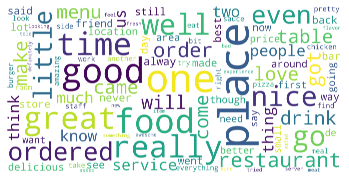

In [14]:
word_cloud_text = ''.join(data.text)
wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white",\
                          scale = 10,width=800, height=400).generate(word_cloud_text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

<p><strong>Note:</strong> While wordclouds can be a useful way of quickly gaining high level insights into raw textual data, they are also limited. In some ways, they can be seen as the pie charts of NLP: often used, but also often hated. <a href="https://www.niemanlab.org/2011/10/word-clouds-considered-harmful/">Some</a> <a href="https://towardsdatascience.com/can-we-please-stop-using-word-clouds-eca2bbda7b9d">people</a> would prefer if they didn't exist at all. If used in the correct way, however, they definitely deserve their place in a data scientist's toolbelt.</p>
<p>The main problem with word clouds is that they are difficult to interpret in a standard way. The layout algorithm has some randomness involved and although more common words are shown more prominently, it's not possible to look at a word cloud and know which words are the most important, or how much more important these are than other words. Colours and rotation are also used randomly, making some words (e.g the ones in bright colours, positioned closer to the centre, with horizontal rotation) seem more important when in fact they are no more important than other words which were randomly assigned a less noticeable combination of color, rotation, and position.</p>

<h3>Exercise 3:</h3>
<p>Write a function <code>word_cloud_rating(data, star_value)</code> that constructs a word cloud from the subset of <code>data</code> that exhibit a certain <code>star_value</code>. Visualize the results of this function for 1-star reviews.</p>

**Answer.**

-------

<h3>Exercise 4:</h3>
<p>The word "good" seems to appear quite frequently in the negative reviews. Investigate why that is and come up with a reasonable explanation.</p>

**Answer.**

-------

<h2>n-grams</h2>
<p>Since 1-grams are insufficient to understand the significance of certain words in our text, it is natural to consider blocks of words, or <strong>n-grams</strong>.</p>
<p>The simplest version of the n-gram model, for $n > 1$, is the <strong>bigram</strong> model, which looks at pairs of consecutive words. For example, the sentence "The quick brown fox jumps over the lazy dog" would have tokens "the quick", "quick brown",..., "lazy dog". The following image explains this concept:</p>
<p><img src="ngrams.png" alt="ngrams" width="500"/></p>
<p>This has obvious advantages and disadvantages over looking at words individually:</p>
<ol>
<li>This retains the structure of the overall document, and</li>
<li>It paves the way for analyzing words in contex; however,</li>
<li>The dimension is vastly larger</li>
</ol>
<p>In practice, this last challenge can be truly daunting. As an example, <em>War and Peace</em> has 3 million characters, which translates to several hundred thousand 1-grams (words). If you consider that the set of all possible bigrams can be as large as the square of the number of 1-grams, this gets us to a hundred billion possible bigrams! If classical ML techniques are not suitable for training on 3 million characters, how can they possibly deal with a hundred billion dimensions?</p>
<p>For this reason, it is often prudent to start by extracting as much value out of 1-grams as possible, before working our way up to more complex structures.</p>

<p>In this section we also start to look again at our main application: calculating some "interesting" features of our corpus of reviews.</p>
<p>When thinking about word analysis, the main topic of interest is finding an <em>efficient</em> and <em>low-dimensional</em> representation in order to facilitate document visualization and larger-scale analyses. We discuss two broad categories of word representations:</p>
<ol>
<li><code>Count-based representations</code>: word-word and word-document matrices.</li>
<li><code>Word embeddings</code>: spectral embedding, UMAP, word2vec, GloVe, and many many more.</li>
</ol>
<p>These are often used to assist with downstream tasks such as clustering, ranking and labeling, which will be briefly discussed in a future case. Word embeddings in particular have become something of a posterchild. These, combined with neural networks (which will also be discussed in a future case!), have led to many of the recent headline improvements in NLP tasks.</p>

<h3>Count-based representations</h3>
<p>n-grams fall under a broader category of techniques otherwise known as <a href="https://scikit-learn.org/stable/modules/feature_extraction.html#common-vectorizer-usage"><strong>count-based representations</strong></a>. These are techniques to analyze documents by indicating how frequently certain types of structures occur throughout.</p>
<p>Let's start with 1-grams (words). The simplest type of information would be whether a particular word occurs in particular documents. This leads to <strong>word-document co-occurrence matrices</strong>, where the $(W, X)$ entry of the word-document matrix is set to 1 if word $W$ occurs in document $X$, and 0 otherwise.</p>
<p>There are many variants of this. In lieu of the fact that we are looking for count-based representations of our documents, one natural variable is the following: the $(W, X)$ entry of the word-document matrix equals the number of times that word $W$ occurs in document $X$, rather than merely being a binary variable.</p>
<p>Let's create a word-document co-occurrence matrix for our set of reviews:</p>

In [15]:
# The following code creates a word-document matrix.

vec = CountVectorizer()
X = vec.fit_transform(AllReviews)
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
df.head()

,00,000,0014,00a,00am,00p,00pm,01,0146,0148,...,été,évaluation,éventuellement,évidemment,évite,éviter,évènement,évènements,êtes,être
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<h3>Exercise 5:</h3>
<p>Find all the high-frequency (top 1%) and low-frequency (bottom 1%) words in the reviews overall. (Hint: import the <code>Counter()</code> function from the <code>collections</code> class.)</p>

**Answer.**

-------

<h3>Exercise 6:</h3>
<p>Write a function called <code>top_k_ngrams(word_tokens, n, k)</code> for printing out the top $k$ n-grams. Use this function to get the top 10 1-grams, 2-grams, and 3-grams from the first 1000 reviews in our dataset.</p>

**Answer.**

-------

<h2>Stop words</h2>
<p>You may have noticed a pattern in the types of words that show up in the top 10 1-grams, 2-grams, and 3-grams. In particular, these are common words that appear in every sentence of the English language: pronoums like "I", prepositions like "but", "of", "and", articles like "the", etc. These very common words are usually uninformative, and their very large occurrence values can distort the results of many NLP algorithms.</p>
<p>For this reason, it is common to pre-process text by removing words that you have a reason to believe are uninformative; these words are called <a href="https://en.wikipedia.org/wiki/Stop_words"><strong>stop words</strong></a>. Usually, it suffices to simply treat extremely common words as stop words. However, for specific types of applications it might make sense to use other stop words; e.g. the word "burger" when analyzing reviews of burger chains.</p>
<p>(Note that stop words are often removed by default as a cleaning step in all NLP tasks. However, sometimes they can be useful. For example in authorship attribution (automatically detecting who wrote a specific piece of text by their 'writing style'), stop words can be one of the most useful features, as they appear in nearly all texts, and yet each author uses them in slightly different ways.)</p>
<p>The <code>nltk</code> library has a standard list of stopwords, which you can download by writing <code>nltk.download(“stopwords”)</code>. We can then load the stopwords package from the nltk.corpus and use it to load the stop words:</p>

In [16]:
nltk.download('stopwords')
from nltk.corpus import stopwords
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to C:\Users\Mohammed
[nltk_data]     Ibraheem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<p>You can get a list of all the Spanish stop words as well:</p>

In [27]:
print(stopwords.words("spanish"))

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

<h3>Exercise 7:</h3>
<h4>7.1</h4>
<p>Filter out all of the stop words in the first review of the Yelp review data and print out your answer. Additionally, print out (separately) the stopwords you found in this review.</p>

**Answer.**

-------

<h4>7.2</h4>
<p>Modify the function <code>top_k_ngrams(word_tokens, n, k)</code> to remove stop words before determining the top n-grams.</p>

**Answer.**

-------

<p>In some contexts, it is common to remove both very common and very <em>uncommon</em> words. The idea is that common words like "a" are almost never informative, while uncommon words like "syzygy" occur so infrequently in a corpus that many algorithms have a hard time processing them in a meaningful way. We will not deal with uncommon words today, but you should be aware that doing so improves the performance of several NLP techniques.</p>

<h2>Finding important words</h2>
<p>Up to this point, we have focused on techniques for transforming our data. We are now ready to start looking for some answers, so let's take a break from discussing techniques so we can explore our dataset and various ways to summarize it.</p>
<p>We begin by looking at the words and n-grams that are most common in positive and negative reviews. Note that in the following code, we don't reuse many of the pre-processing steps discussed at the start of the tutorial. This is because many of them are included as options in existing packages. In a serious project one would often customize this pre-processing to some degree, but we skip this in order to get some displayable results.</p>

In [18]:
# Following code grabbed from:
# https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a
# we will use it in our context to create some visualizations.
def get_top_n_words(corpus, n=1,k=1):
    vec = CountVectorizer(ngram_range=(k,k),stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

place 2975
good 2893
food 2716
just 2337
like 2301
great 2088
time 1974
really 1846
service 1624
ve 1386
don 1219
nice 1202
little 1169
ordered 1147
try 988
came 961
menu 950
pretty 938
love 933
order 928


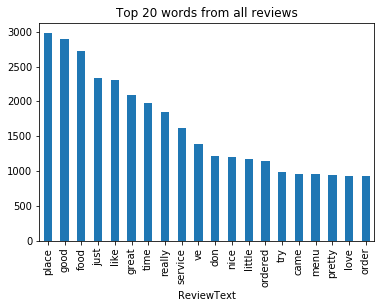

In [19]:
# We start by getting a list of the most common words.

common_words = get_top_n_words(data['text'], 20,1)
for word, freq in common_words:
    print(word, freq)
df = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',  title='Top 20 words from all reviews')


<h3>Exercise 8:</h3>
<h4>8.1</h4>
<p>Divide the data into "good reviews" (i.e. <code>stars</code> rating was greater than 3) and "bad reviews" (i.e. <code>stars</code> rating was less than 3) and make a bar plot of the top 20 words in each case. Are these results different from above?</p>

**Answer.**

-------

<h4>8.2</h4>
<p>Use the <code>get_top_n_words()</code> function to find the top 20 bigrams and trigrams. Do the results seem useful?</p>

**Answer.**

-------

<h3>Question:</h3>
<p>Look at the 5 most important bigrams for bad reviews. What <em>single, specific</em> problem seems to be the most important driver of bad reviews?</p>

<p>Three of the top 5 bigrams were "20 minutes", "15 minutes", and "10 minutes." These are all times, <em>strongly</em> suggesting that <em>waiting time for service</em> is a main driver for bad review scores.</p>

<h3>Exercise 9:</h3>
<h4>9.1</h4>
<p>You may have noticed that many of the important "bad" bigrams included the words "like" or "just" but didn't seem very informative (e.g. "felt like", "food just"). Give some ideas of how to use this sort of observation in future pre-processing of reviews, based on the pre-processing ideas we have already studied.</p>

**Answer.**

-------

<h4>9.2</h4>
<p>Building on the previous question, we note that most of the most important complaints and compliments can't be <em>completely</em> observed by looking at bigrams or trigrams. This can often be fixed by small modifications. Do the following:</p>
<ol>
<li>Write down a complaint that is unlikely to be (completely) picked up by bigram analysis. Hint: what might you write if your hamburger was served cold?</li>
<li>Write down a processing step that would fix this problem. Try to find a solution that would work for several similar problems without additional human input.</li>
</ol>

**Answer.**

-------

## Regular Expressions (25 min)

Having spent a lot of time on n-grams and how to featurize a document using them, we now take a break from `nltk` tools to introduce the most important text wrangling tool in Python (and many other languages): [**regular expressions**](https://en.wikipedia.org/wiki/Regular_expression).

The basic idea here is that you often want to perform some specific transformation (e.g. delete or substitute) every time that some possibly-complicated pattern (e.g. the letter 'A', the word 'hello', any word containing the letters 'a','r' in that order) occurs. Regular expressions are a compact and powerful language for expressing these sorts of patterns. This is super important whenever you are trying to clean a text dataset that contains thematically similar, but not exactly, the same errors. 

The terse syntax of regular expressions has led to them having a reputation for being [almost magical](https://xkcd.com/208/) in some situations (with only a few characters, you can build complete computer programs) but also for being difficult to create and read, which can [create more problems](https://xkcd.com/1171/) than they solve.

In Python, [the `re` module](https://docs.python.org/3/library/re.html) provides regular expression matching operations and common operations. Regular expressions are a deep subject, with some documentation here: https://docs.python.org/3/library/re.html?highlight=regex.

As some simple examples, we have:

1. `.` matches any character except \n (newline)
2. `\d` matches any digit (this can also be written as [0-9])
3. `\D` matches any non-digit (this can also be written as [^0-9])
4. `\w` matches any alphanumeric character ([a-zA-Z0-9_])
5. `\W` matches any non-alphanumeric character ([^a-zA-Z0-9_])

As some more complex examples, regular expressions also allow you to quantify the number of times matches can occur. For example,

1. `[a-d]+` matches any time you get $\{a,b,c,d\}$ one or more times in a row
2. `[a-d]{3}` matches any time you get them exactly 3 times in a row
3. `[a-d]*` matches any time you get them 0 or more times in a row

For now, we give a simple application based on the  `re.sub()` function, which substitutes words that match a pattern:

In [20]:
sentence = 'That was an "interesting" way to cook bread.'
pattern = r"[^\w]" # the ^ character denotes 'not', 
#                   the \w character denotes a word, and []  means
#                    anything that matches anything in the brackets. 
#                     Together, this refers to any character that is not a word.
print(re.sub(pattern, " ", sentence))

That was an  interesting  way to cook bread 


In [21]:
str = "Natesh loves all the foold and loveds sdaslo"
x   = re.compile('lo')
iterator = x.finditer(str)
for item in iterator:
    print(item.span())
    print(item.group())

(7, 9)
lo
(31, 33)
lo
(42, 44)
lo


<h3>Exercise 10:</h3>
<h4>10.1</h4>
<ol>
<li>Use the <code>re.split()</code> function to split the first Yelp review into a list of its constituent words.</li>
<li>Use the <code>re.findall()</code> function to search the first 30 reviews for the number of times they contain the word "food". Print the maximum number of times the word "food" is mentioned in a single review.</li>
</ol>

**Answer.**

-------

<h4>10.2</h4>
<p>Using regular expressions, find the percentage of reviews in top 500 reviews that have numbers in them.</p>

**Answer.**

-------

<h4>10.3</h4>
<p>Using the above as a template, write a generalized function that can extract the first word following "good". Don't forget to include a default behavior for when the word doesn't appear in the sentence. Run this function for all reviews and print the first 300 results for reviews that do contain the word "good".</p>

**Answer.**

-------

<p>Skimming over the results of the previous exercise, a few things stood out:</p>
<ol>
<li>People like to talk about good burgers – this appeared 5 times in the first 300 results.</li>
<li>A large number of the results are useless. One common problem is the occurrence of a sentence boundary; e.g. "good. The" near the start of the list. In this case, we should look <em>before</em> the word "good" rather than after. However, we can't look <em>immediately</em> before good – that word will usually be some conjugation of "to be", which is also not informative – rather, we need to look for a word before "good" that isn't too boring. Other times, there is a word following "good" that is uninformative; e.g. "good for" – we want to know <em>what</em> something was good for! In this case, we should keep on skimming <em>forward</em> until we see a word following "good" that isn't too boring.</li>
</ol>
<p>In both of these cases, we can't use simple regular expressions by themselves, as regular expressions don't know how to ignore "boring" words. Regular expressions can only help us filter for the structure of words, not the content they convey within a context. We <em>can</em> use what we learned about stop words to remove these from the reviews before conducting the above analysis, but as we have been, we will still sometimes get not very informative phrases like "was cold" or "served cold". So we will introduce an alternative method, which can be applied to serve as an even better remover of stop words: <strong>part-of-speech tagging</strong>.</p>

<h2>Part-of-speech (POS) tagging</h2>
<p>In English, there are eight main parts of speech - <code>nouns</code>, <code>pronouns</code>, <code>adjectives</code>, <code>verbs</code>, <code>adverbs</code>, <code>prepositions</code>, <code>conjunctions</code> and <code>interjections</code>. These are
<code>sustantivos</code>, <code>pronombres</code>, <code>adjetivos</code>, <code>verbos</code>, <code>adverbios</code>, <code>preposiciones</code>, <code>conjunciones</code> and <code>interjecciones</code>, respectively, in Spanish. The purpose of POS tagging is to label each word in a document with its part of speech.</p>
<p>Unsurprisingly, <a href="http://www.nltk.org/book/ch05.html">POS tagging</a> can be very difficult to do by hand. <code>nltk</code> has a default function for this, called <code>nltk.pos_tag()</code>, which we will use. As a word of warning, this function is far from infallible, especially on informal text (e.g. website reviews, forum posts, text messages, etc), and words in English often exhibit POS drift (e.g. the drift of "Google" from noun to verb): </p>

In [29]:
nltk.download('averaged_perceptron_tagger')
#https://www.nltk.org/book/ch05.html
text_word_token = nltk.word_tokenize("Natesh is having a good day")
#text_word_token = nltk.word_tokenize(data.text[0])
nltk.pos_tag(text_word_token)
#https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Mohammed
[nltk_data]     Ibraheem\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('Natesh', 'NNP'),
 ('is', 'VBZ'),
 ('having', 'VBG'),
 ('a', 'DT'),
 ('good', 'JJ'),
 ('day', 'NN')]

In [23]:
text_word_token = nltk.word_tokenize("We are going to Race") # try "Race can be both a verb and a noun"
#text_word_token = nltk.word_tokenize(data.text[0])
nltk.pos_tag(text_word_token)

[('We', 'PRP'), ('are', 'VBP'), ('going', 'VBG'), ('to', 'TO'), ('Race', 'VB')]

In [24]:
#https://www.nltk.org/_modules/nltk/tag/perceptron.html
nltk.pos_tag(words)

[('A', 'DT'),
 ('bit', 'NN'),
 ('outside', 'IN'),
 ('of', 'IN'),
 ('downtown', 'JJ'),
 ('montreal', 'NN'),
 ('but', 'CC'),
 ('take', 'VB'),
 ('the', 'DT'),
 ('metro', 'NN'),
 ('out', 'IN'),
 ('and', 'CC'),
 ('it', 'PRP'),
 ("'s", 'VBZ'),
 ('less', 'JJR'),
 ('than', 'IN'),
 ('a', 'DT'),
 ('10', 'CD'),
 ('minute', 'NN'),
 ('walk', 'NN'),
 ('from', 'IN'),
 ('the', 'DT'),
 ('station', 'NN'),
 ('.', '.')]

<p>NLTK provides documentation for each tag, which can be queried using the tag itself; e.g. <code>nltk.help.upenn_tagset('RB')</code>. Since POS is context-sensitive, POS-taggers must usually be trained on an existing corpus that has been tagged by professional linguists (possibly alongside unlabeled data to take advantage of semi-supervised methods). The most popular tag set is called the Penn Treebank set:</p>

In [25]:
# We can get more details about any POS tag using the help function of nltk
nltk.download('tagsets')
nltk.help.upenn_tagset('CD$')
nltk.help.upenn_tagset('NN$')

[nltk_data] Downloading package tagsets to C:\Users\Mohammed
[nltk_data]     Ibraheem\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping help\tagsets.zip.


CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...


<h3>Exercise 11:</h3>
<h4>11.1</h4>
<p>Write code to find the percentage of reviews in the first 500 reviews of the dataset that contains a number or a cardinal using POS taggings only. (Hint: POS tag <code>CD</code> is the indicator for cardinal or number.) How does this compare to the figure we extracted from using regular expressions only?</p>

**Answer.**

-------

<h4>11.2</h4>
<p>Extract all of the nouns from each review using POS tagging. This may be useful for later analysis. Even though words like "good" may be the most prevalent in good reviews, we think nouns like "service" or "burgers" are likely to be more informative.</p>

**Answer.**

-------

<h3>Exercise 12:</h3>
<p>Use POS tagging to find the first word following "good" that has an interesting POS tag. We leave this up to your discretion, but should probably include nouns and proper nouns. Inspecting the above, we think that cardinals are also almost certainly interesting: we recognize that "good 45" is probably followed by "minutes", definitely an important (though not "good") part of a review!</p>

**Answer.**

-------

<h3>Exercise 13:</h3>
<p>It is interesting to look specifically at Adjectives (which have a tag name of "JJ" in NLTK) when looking at reviews. We can hypothesise that good reviews and bad reviews might use very different adjectives, but that some adjectives might appear often in both good and bad reviews, as we saw with the word "good" previously.</p>
<p>Use POS tags to extract all adjectives from the first 500 five star reviews and the first 500 one star reviews. Extract the most 30 most commonly used adjectives from each set of reviews and print out both. Make a note of several of these; say if they appear in one or both lists, and whether or not this was expected, and why.</p>

**Answer.**

-------

<h2>Conclusions</h2>
<p>In this case, we focused on the basic components of an NLP pipeline, virtually all of which are frequently used <em>before</em> building a model for the business question of interest. We saw that every part of the pipeline was highly customizable, and discussed how parameters might vary depending on the specific application in mind. </p>
<p>In addition to constructing a basic pipeline, we tried to give initial answers to a business question: "Which factors are most important for bad reviews?" The answers we obtained with this out-of-the-box analysis were not perfect, but they did seem to give some genuinely useful information. For example, 3 of the 5 most important phrases for bad reviews were "20 minutes", "10 minutes", and "15 minutes" – strong evidence that long service times were a major driver of bad reviews.</p>

<h2>Takeaways</h2>
<p>Text pre-processing is more complex than other forms of pre-processing you might be familiar with, as good pre-processing may rely on an enormous number of rules extracted from large corpora of English (Spanish!) text. You shouldn't try to recreate this work by yourself; instead, take advantage of large and powerful libraries such as <code>nltk</code> which have built-in corpora when possible, and use regular expressions when necessary to extend or tweak them.</p>
<p>Pre-processing is an extremely important and nontrivial part of NLP, and will likely take the bulk of the work for most NLP projects. Most popular parts of the pipeline come with many parameters. Yet they can give surprisingly useful summaries of entire corpora without much adjustment.</p>
<p>Overall, NLP can be used in many situations, but it is perhaps most useful in its ability to turn qualitative data into quantitative data. For example, if we have a collection of reviews describing, qualitatively, people’s experiences at restaurants, we can derive quantitative insights such as “X% of people who left bad reviews were unhappy with the waiting time”.</p>
<p>After following through this case, you know what NLP is and how it can be useful. You especially know</p>
<ul>
<li>The challenges of NLP: context specificity and high dimensionality.</li>
<li>How to standardize and pre-process text before carrying out analysis, such as stemming </li>
<li>How to tokenize documents into sentences and words</li>
<li>How to create word clouds to quickly gain high-level insights into text</li>
<li>What n-grams are and how they can be created and used in analysis</li>
<li>Why common (“stop”) words should often be removed before analysis</li>
<li>How to find common words and n-grams</li>
<li>What regular expressions are and how to use them to carry out more custom analysis</li>
<li>What Parts of Speech tagging is and why analysing documents by their grammatical structure can be useful</li>
</ul>